In [31]:
from visiprog.data import *
from visiprog.metriclearning import *
from visiprog.evaluate import *
%matplotlib inline
import numpy as np
from visiprog.metric_learn.fda_visiprog import LFDA_VISIPROG

from IPython.display import Image, display

np.set_printoptions(precision=2)

In [2]:
raw_feature = np.genfromtxt('visiprog/data/curetaliasfree.csv',delimiter=",")
print(raw_feature.shape)
label = np.genfromtxt('/Users/andrey/Dropbox/Hacking/Research/VisiProg2/analysis/thesis/visiprog/data/label.csv', delimiter = ',').astype(int)
label = label - 1

(5245, 82)


# Baseline approach
STSIM-M approach, no training

In [3]:
X_STSIMM, M = train_covariance(raw_feature)

In [4]:
np.savetxt('STSIM_M.csv', M, fmt='%.2f', delimiter=',')
res = leave_one_sample_out(X_STSIMM)
print(res['accuracy'])

0.871687321258


# Fisher linear discriminant approach

Exact solution, however trained with semantic labels ...

In [5]:
X_fisher, M_fisher = fisher_discriminant(X_STSIMM, label)

In [6]:
np.savetxt('FDA_semantic.csv', M, fmt='%.2f', delimiter=',')
res_fda = leave_one_sample_out(X_fisher)
print(res_fda['accuracy'])

0.990276453765


Now train using ViSiProg label

In [7]:
groups, N = readVSPLabel()


In [8]:
visiprog_label = np.zeros((N,))

count = 0
for g in groups:
    label = False
    
    # check whether any entry in the group has been labelled yet
    # if yes, then merge with that existing label
    for i in g:
        if visiprog_label[i] != 0:
            label = visiprog_label[i]
            break
    
    # if no, then create a new label
    if label == False:
        count += 1
        label = count
        
    for i in g:
        visiprog_label[i] = label


In [9]:
# print(visiprog_label[:50])

# np.savetxt('visiprog_label.csv', visiprog_label)

In [10]:
model = LFDA_VISIPROG()
model.fit(X_STSIMM, visiprog_label)

X_vsp = model.transform(X_STSIMM)

In [11]:
res_vsp = leave_one_sample_out(X_vsp)
print(res_vsp['accuracy'])

0.990657769304


In [18]:
comparison = (res_vsp['prediction'] != res_fda['prediction'])
print(np.sum(comparison))

65


In [28]:
mismatch = np.where(comparison == True)[0].astype(int)

print(mismatch)


[ 160  232  240  243  571  584  587  771  772  798  845  864  950  951  955
  967 1059 1061 1255 1397 1414 1472 1487 1726 1750 1943 2032 2034 2154 2229
 2235 2281 2328 2400 2515 2583 2584 2675 3392 3410 3591 3664 3699 3741 3748
 3754 3833 3925 3959 3970 4237 4299 4339 4595 4602 4609 4613 4622 4790 4965
 5028 5065 5226 5229 5239]


In [29]:
listImg = readImgList()


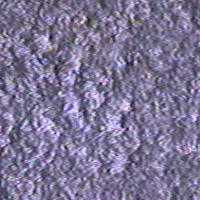

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/03-033.png prediction 45


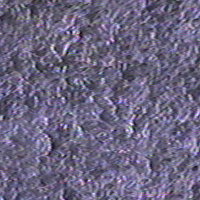

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/03-160.png prediction 3


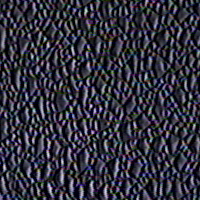

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/04-002.png prediction 49


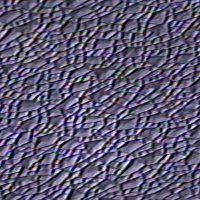

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/04-016.png prediction 10


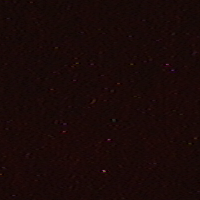

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/07-145.png prediction 7


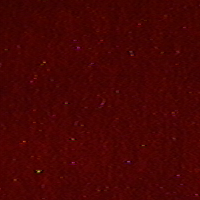

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/07-178.png prediction 34


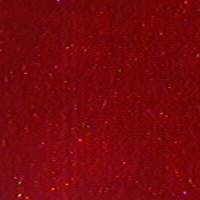

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/07-183.png prediction 34


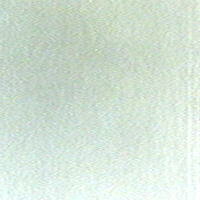

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/09-183.png prediction 1


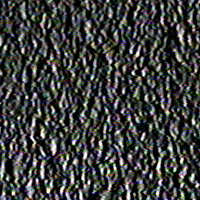

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/10-002.png prediction 10


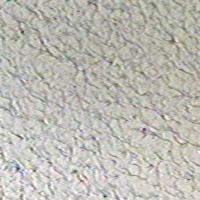

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/10-050.png prediction 11


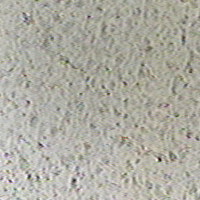

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/10-141.png prediction 11


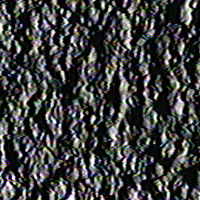

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/11-002.png prediction 47


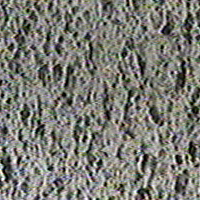

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/11-165.png prediction 10


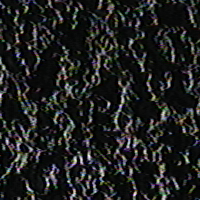

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/11-175.png prediction 45


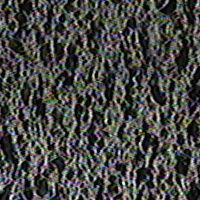

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/11-183.png prediction 11


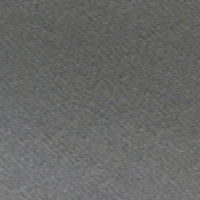

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/12-032.png prediction 17


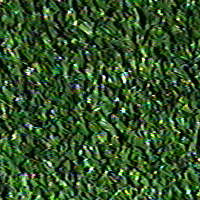

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/13-032.png prediction 13


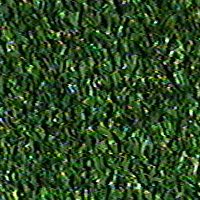

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/13-035.png prediction 13


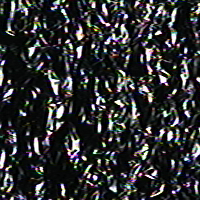

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/15-047.png prediction 15


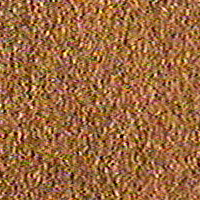

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/16-141.png prediction 16


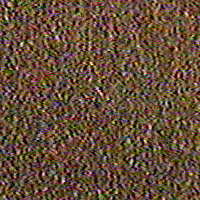

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/16-181.png prediction 16


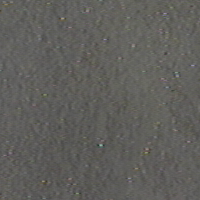

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/17-141.png prediction 17


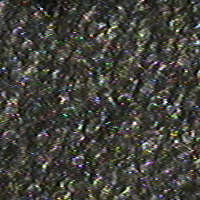

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/18-016.png prediction 48


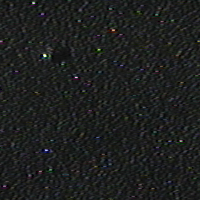

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/20-109.png prediction 41


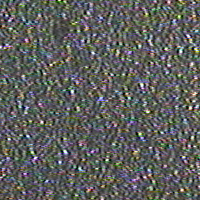

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/20-156.png prediction 16


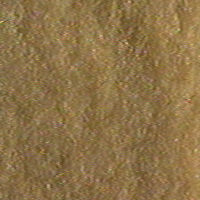

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/22-183.png prediction 22


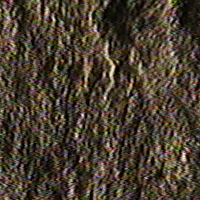

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/24-178.png prediction 24


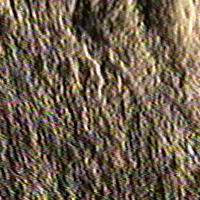

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/24-181.png prediction 50


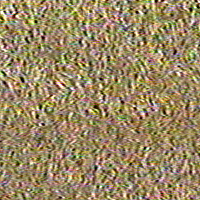

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/26-054.png prediction 26


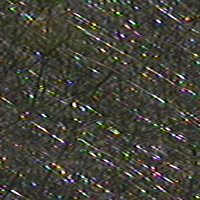

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/27-035.png prediction 48


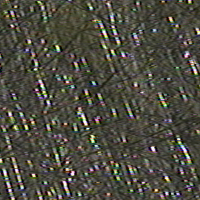

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/27-043.png prediction 26


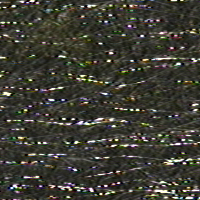

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/27-122.png prediction 27


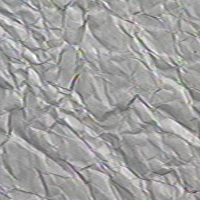

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/28-044.png prediction 30


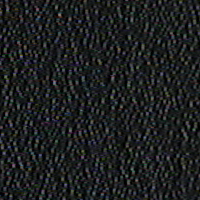

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/29-002.png prediction 16


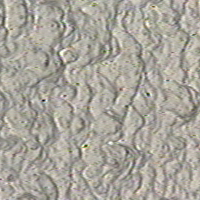

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/30-047.png prediction 11


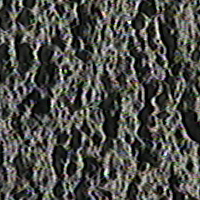

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/30-183.png prediction 45


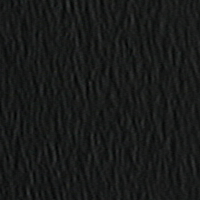

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/31-002.png prediction 12


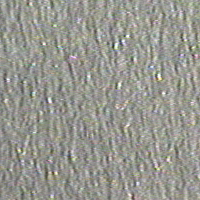

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/31-183.png prediction 31


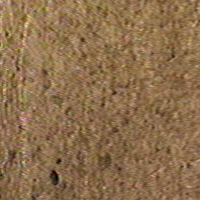

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/39-141.png prediction 52


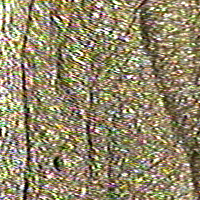

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/39-183.png prediction 54


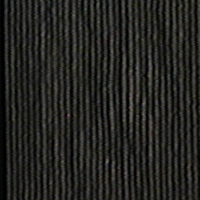

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/42-002.png prediction 51


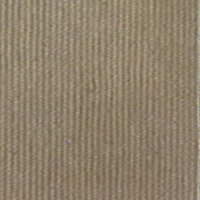

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/42-141.png prediction 56


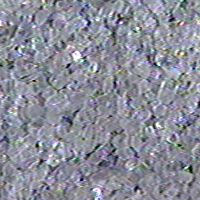

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/43-039.png prediction 43


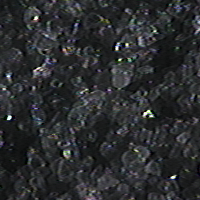

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/43-109.png prediction 43


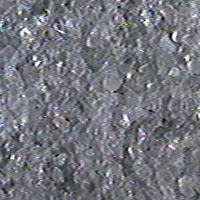

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/43-122.png prediction 43


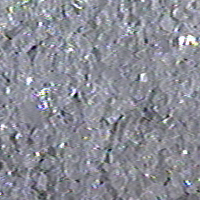

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/43-134.png prediction 43


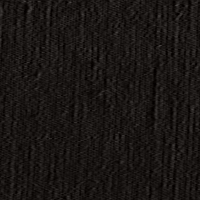

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/44-109m.png prediction 7


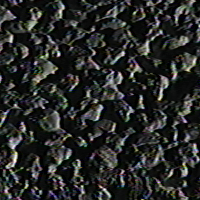

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/45-109.png prediction 47


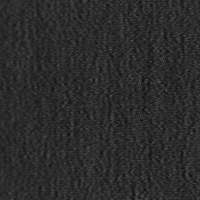

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/46-002m.png prediction 46


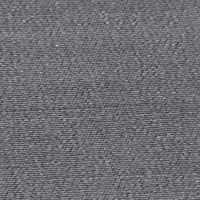

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/46-032m.png prediction 44


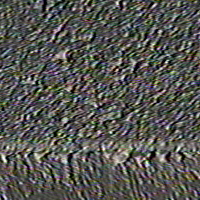

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/49-016.png prediction 16


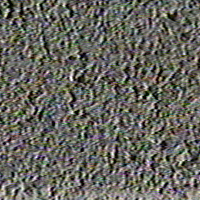

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/49-122.png prediction 49


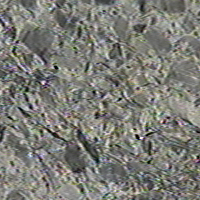

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/50-035.png prediction 50


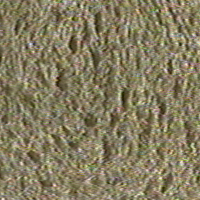

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/52-161.png prediction 43


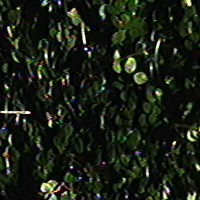

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/53-002.png prediction 61


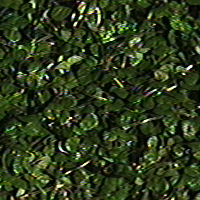

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/53-025.png prediction 53


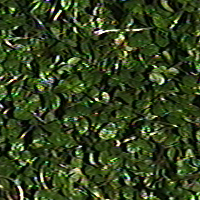

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/53-032.png prediction 53


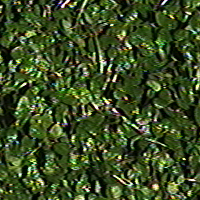

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/53-044.png prediction 53


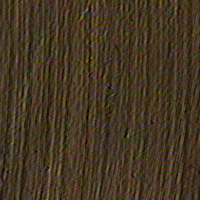

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/56-017.png prediction 56


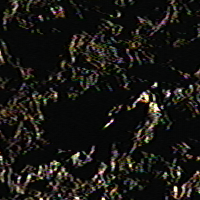

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/58-175.png prediction 53


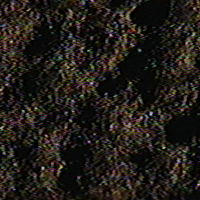

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/59-109.png prediction 59


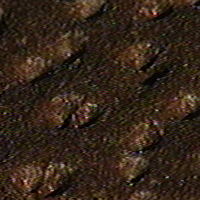

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/60-016.png prediction 60


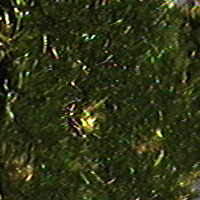

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/61-141.png prediction 61


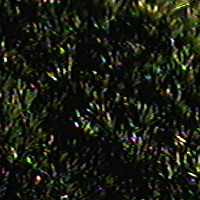

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/61-147.png prediction 61


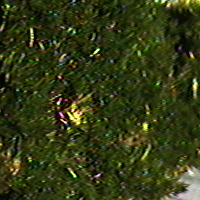

Groundtruth /Users/andrey/Dropbox/Hacking/Research/VisiProg2/firebase/curetaliasfree/static/CURET/images/61-165.png prediction 50


In [39]:
for i in mismatch:
    display(Image(filename = listImg[i]))
    gt = listImg[i].split("-")[1]
    print("Groundtruth {} prediction {}".format(listImg[i], int(res_vsp['prediction'][i])))
    